In [1]:
#import the dataset 
import pandas as pd
df=pd.read_csv("ICRISAT-District Level Data - ICRISAT-District Level Data.csv")
df 

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.00,185.00,337.59,44.00,20.00,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.00,409.00,747.71,50.00,26.00,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.30,468.00,841.27,53.70,30.00,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.40,400.80,711.40,49.40,26.50,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.60,473.60,828.55,44.20,29.00,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16141,917,2013,15,Jharkhand,Singhbhum,267.06,579.70,2170.67,1.53,1.85,...,0.00,0.0,0.0,0.0,0.00,9.02,9.03,0.48,0.08,0.00
16142,917,2014,15,Jharkhand,Singhbhum,256.33,586.63,2288.57,5.36,6.65,...,0.00,0.0,0.0,0.0,0.00,8.63,8.64,0.46,0.04,0.00
16143,917,2015,15,Jharkhand,Singhbhum,263.21,264.71,1005.70,1.99,1.82,...,0.00,0.0,0.0,0.0,0.00,6.84,6.85,0.42,0.01,0.00
16144,917,2016,15,Jharkhand,Singhbhum,224.05,319.01,1423.84,0.38,0.83,...,0.00,0.0,0.0,0.0,0.03,6.40,6.43,0.03,0.01,0.00


In [2]:
#drop duplicated columns
df.drop_duplicates(inplace=True)

In [3]:
#checking null values
df1=df.isnull().sum()
df1[df1>0]

Series([], dtype: int64)

In [4]:
#checking the datatypes of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [5]:
# converts all column names into lower strings and replaces all the space with the underscore
df.columns=df.columns.str.lower().str.replace(" ","_")

In [6]:
#removes the parenthesis which is placed in between the column names
df.columns=df.columns.str.replace(r"[()]","",regex=True)

In [7]:
#standazing the columns of the crop details in hectare and kilogram
area_column=[col for col in df.columns if "_area_1000_ha" in col]
production_column=[col for col in df.columns if "_production_1000_tons" in col]
yield_column=[col for col in df.columns if "_yield_kg_per_ha" in col]

# Convert area from 1000 hectares to hectare
df[area_column] = df[area_column] / 1000
# Convert production from 1000 tons to ton
df[production_column]=df[production_column]/1000
# Convert yield from kg/ha to ton/ha
df[yield_column]=df[yield_column]/1000

In [8]:
#change the column name according to its units
df.columns=df.columns.str.replace("1000","1")
df.columns=df.columns.str.replace("tons","ton")
df.columns=df.columns.str.replace("kg","ton")

In [9]:
# removing extra space in the left or right of the strings
df=df.apply(lambda x:x.str.strip() if x.dtypes=="object" else x)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   dist_code                              16146 non-null  int64  
 1   year                                   16146 non-null  int64  
 2   state_code                             16146 non-null  int64  
 3   state_name                             16146 non-null  object 
 4   dist_name                              16146 non-null  object 
 5   rice_area_1_ha                         16146 non-null  float64
 6   rice_production_1_ton                  16146 non-null  float64
 7   rice_yield_ton_per_ha                  16146 non-null  float64
 8   wheat_area_1_ha                        16146 non-null  float64
 9   wheat_production_1_ton                 16146 non-null  float64
 10  wheat_yield_ton_per_ha                 16146 non-null  float64
 11  kh

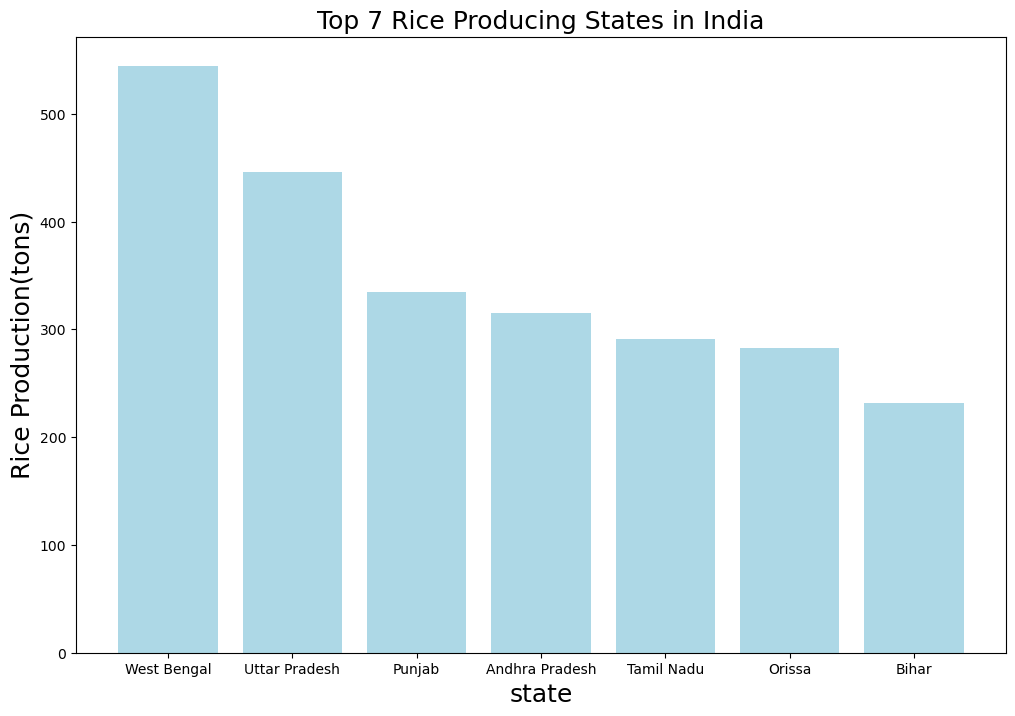

In [11]:
#Top 7 RICE PRODUCTION State Data(Bar_plot)
import matplotlib.pyplot as plt
top_rice_prod_states= df.groupby("state_name")["rice_production_1_ton"].sum().reset_index()
top_rice_prod_states=top_rice_prod_states.sort_values(by="rice_production_1_ton",ascending=False).head(7)
plt.figure(figsize=(12,8))
plt.bar(top_rice_prod_states["state_name"],top_rice_prod_states["rice_production_1_ton"],color="lightblue")
plt.xlabel("state",fontsize=18)
plt.ylabel("Rice Production(tons)",fontsize=18)
plt.title("Top 7 Rice Producing States in India", fontsize=18)
plt.show()

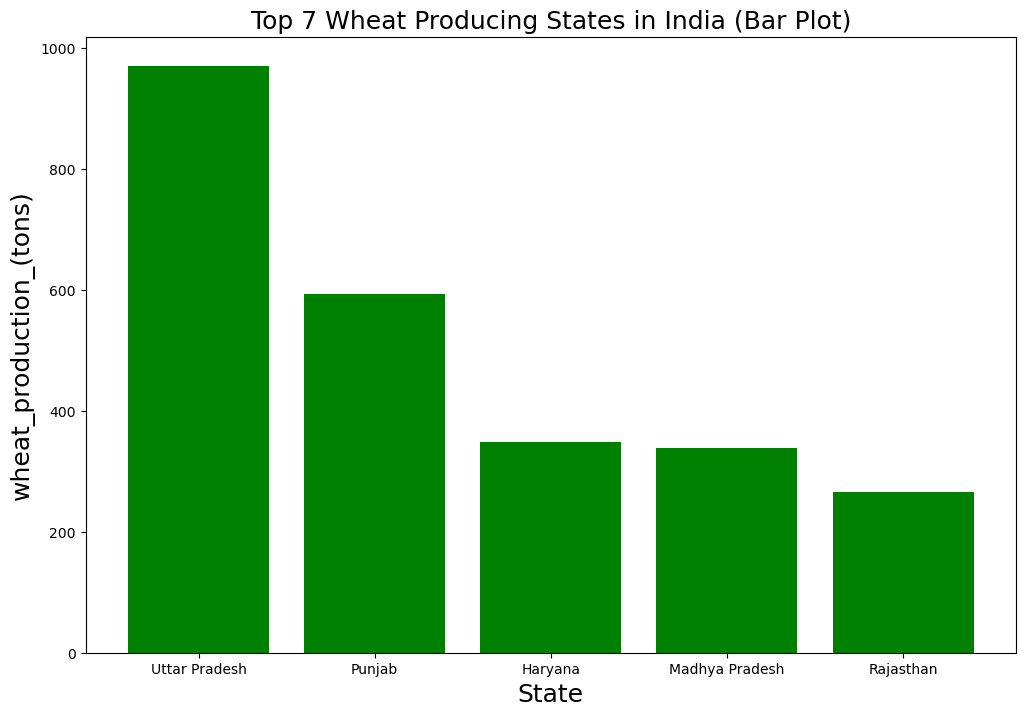

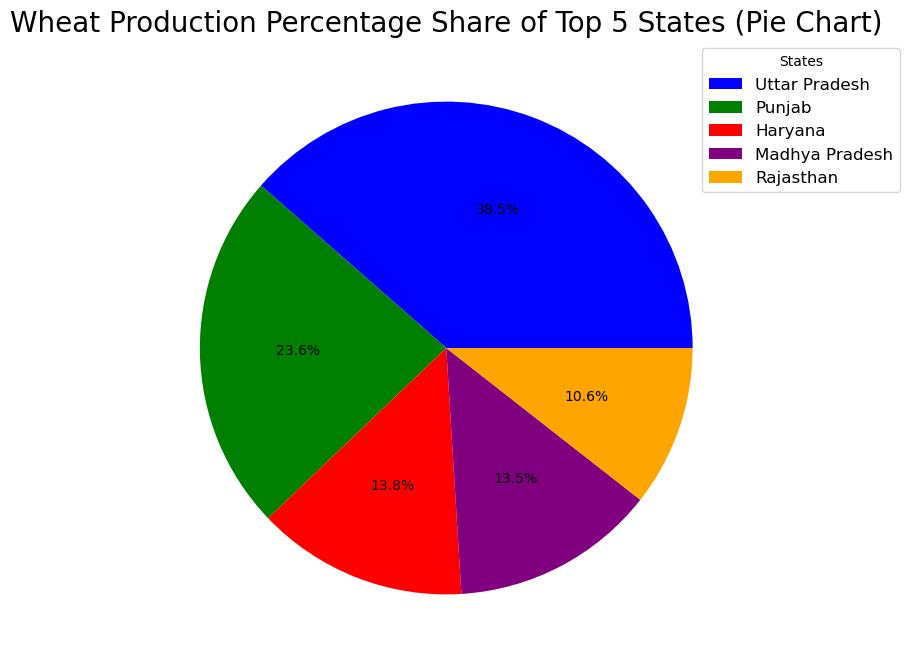

In [13]:
#Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
top_wheat_states=df.groupby("state_name")["wheat_production_1_ton"].sum().reset_index()
top_wheat_states=top_wheat_states.sort_values(by="wheat_production_1_ton",ascending=False).head(5)
#bar chart
plt.figure(figsize=(12,8))
plt.bar(top_wheat_states["state_name"],top_wheat_states["wheat_production_1_ton"],color="green")
#labelling X and Y axis
plt.xlabel("State",fontsize=18)
plt.ylabel("wheat_production_(tons)",fontsize=18)
# formatting Yaxis in numbers
plt.ticklabel_format(style='plain', axis='y')
#Title to the bar chart
plt.title("Top 7 Wheat Producing States in India (Bar Plot)", fontsize=18)
#show the bar chart
plt.show()

total_production = top_wheat_states["wheat_production_1_ton"].sum()
percentages = (top_wheat_states["wheat_production_1_ton"] / total_production) * 100
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, autopct='%1.1f%%', colors=['blue', 'green', 'red', 'purple', 'orange'])
# Title for pie chart
plt.title("Wheat Production Percentage Share of Top 5 States (Pie Chart)", fontsize=20)
# Add legend for the states
plt.legend(top_wheat_states["state_name"], title="States", loc="upper right", fontsize=12,bbox_to_anchor=(1.25, 1))
# Show the pie chart
plt.show()

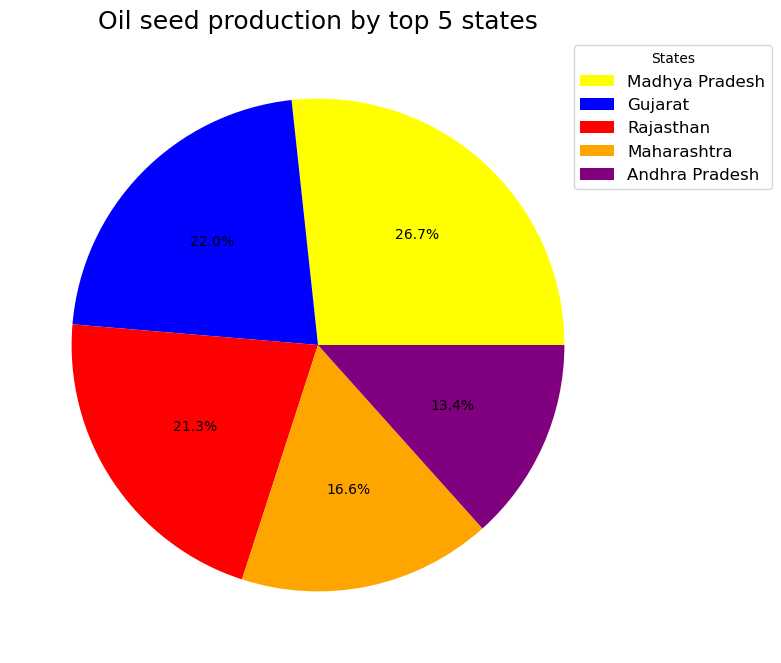

In [14]:
#Oil seed production by top 5 states
oil_seed_prod_state=df.groupby("state_name")["oilseeds_production_1_ton"].sum().reset_index()
oil_seed_prod_state=oil_seed_prod_state.sort_values(by="oilseeds_production_1_ton",ascending=False).head(5)
total_production= oil_seed_prod_state["oilseeds_production_1_ton"].sum()
percentage=(oil_seed_prod_state["oilseeds_production_1_ton"]/total_production)*100
#figuresize
plt.figure(figsize=(8,8))
#define pie chart
plt.pie(percentage,autopct="%1.1f%%",colors=["yellow", "blue", "red", "orange", "purple"])
#title
plt.title("Oil seed production by top 5 states",fontsize=18)
#legend
plt.legend(oil_seed_prod_state["state_name"],title="States",loc="upper right",fontsize=12,bbox_to_anchor=(1.25,1))
#show
plt.show()


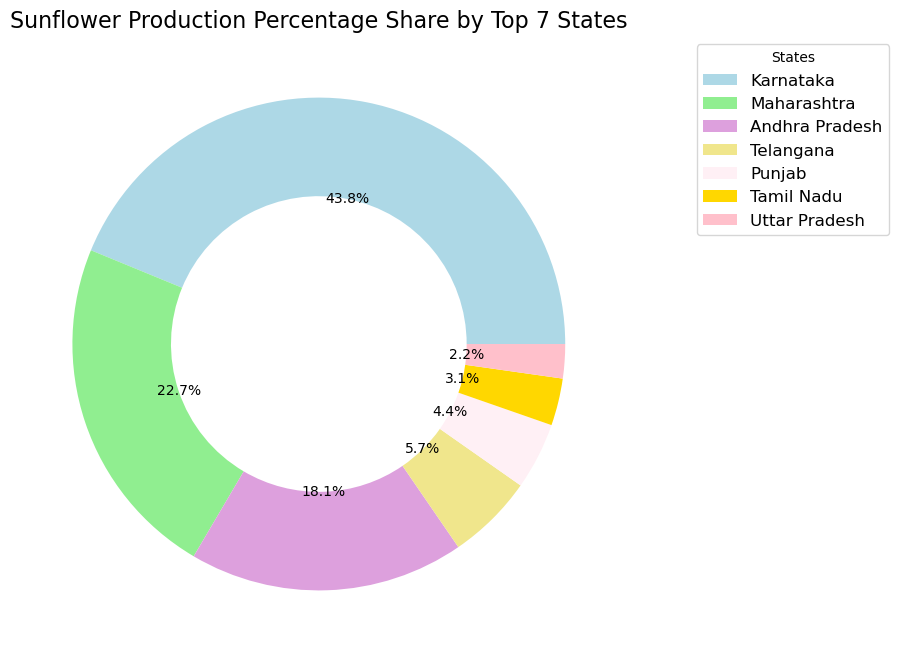

In [15]:
#Top 7 SUNFLOWER PRODUCTION  State_
top_sunflower_states=df.groupby("state_name")["sunflower_production_1_ton"].sum().reset_index()
top_sunflower_states=top_sunflower_states.sort_values(by="sunflower_production_1_ton",ascending=False).head(7)
total_production= top_sunflower_states["sunflower_production_1_ton"].sum()
percentage=(top_sunflower_states["sunflower_production_1_ton"]/total_production)*100
plt.figure(figsize=(8, 8))
plt.pie(percentage,autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'plum', 'khaki', 'lavenderBlush', 'gold', 'pink'], 
        wedgeprops=dict(width=0.4))  # The 'width' creates the hole in the middle
# Title for the Donut Chart
plt.title("Sunflower Production Percentage Share by Top 7 States", fontsize=16)
#legend
plt.legend(top_sunflower_states["state_name"], title="States", loc="upper left", fontsize=12, bbox_to_anchor=(1.1, 1))
# Show the plot
plt.show()

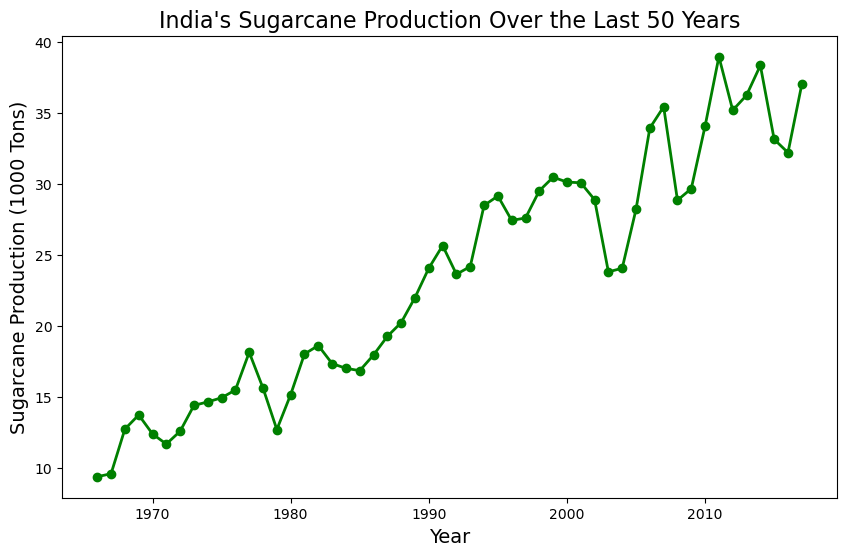

In [16]:
#India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugarcane_prod_for_years=df.groupby("year")["sugarcane_production_1_ton"].sum().reset_index()
#figuresize
plt.figure(figsize=(10, 6))
# Plot the line for sugarcane production
plt.plot(sugarcane_prod_for_years['year'], sugarcane_prod_for_years['sugarcane_production_1_ton'], marker='o', color='g', linestyle='-', linewidth=2)
# titles and labels
plt.title("India's Sugarcane Production Over the Last 50 Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Sugarcane Production (1000 Tons)", fontsize=14)
# Show the plot
plt.show()

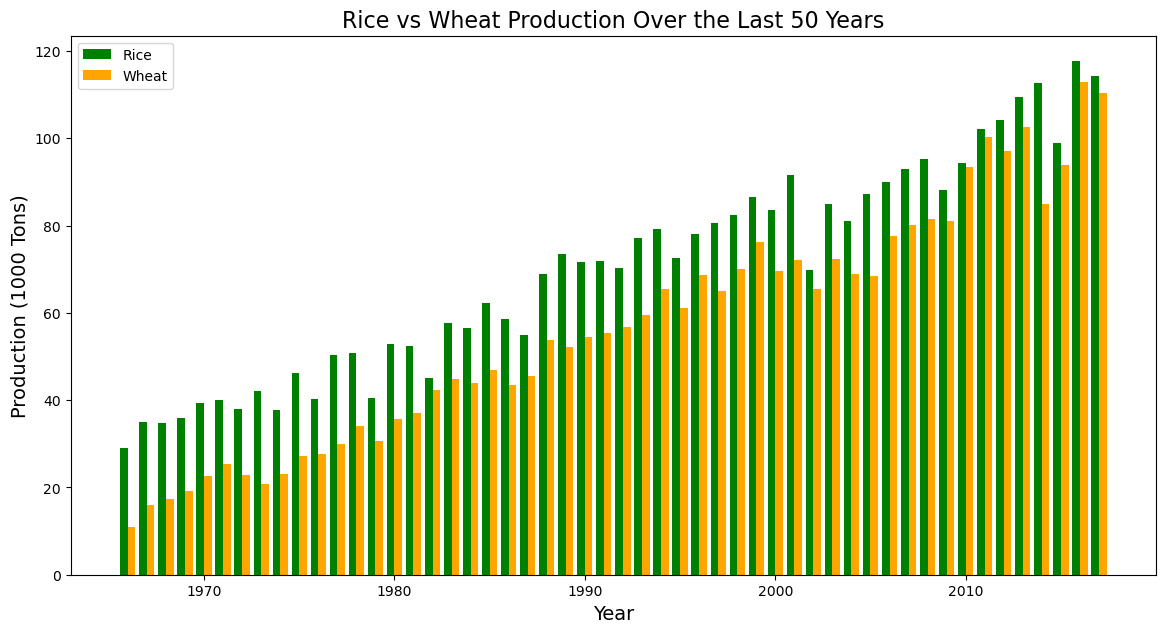

In [17]:
#Rice Production Vs Wheat Production (Last 50y)
rice_prod_for_years=df.groupby("year")["rice_production_1_ton"].sum().reset_index()
wheat_prod_for_years=df.groupby("year")["wheat_production_1_ton"].sum().reset_index()
combined_prod = pd.merge(rice_prod_for_years, wheat_prod_for_years, on="year", how="inner", 
                         suffixes=('_rice', '_wheat'))
# figuresize
plt.figure(figsize=(14, 7))
# Plotting Rice production as bars
plt.bar(combined_prod['year'] - 0.2, combined_prod['rice_production_1_ton'], width=0.4, color='green', label='Rice')
# Plotting Wheat production as bars
plt.bar(combined_prod['year'] + 0.2, combined_prod['wheat_production_1_ton'], width=0.4, color='orange', label='Wheat')
# Adding titles and labels
plt.title("Rice vs Wheat Production Over the Last 50 Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Production (1000 Tons)", fontsize=14)
# Adding a legend
plt.legend()
# Show the plot
plt.show()


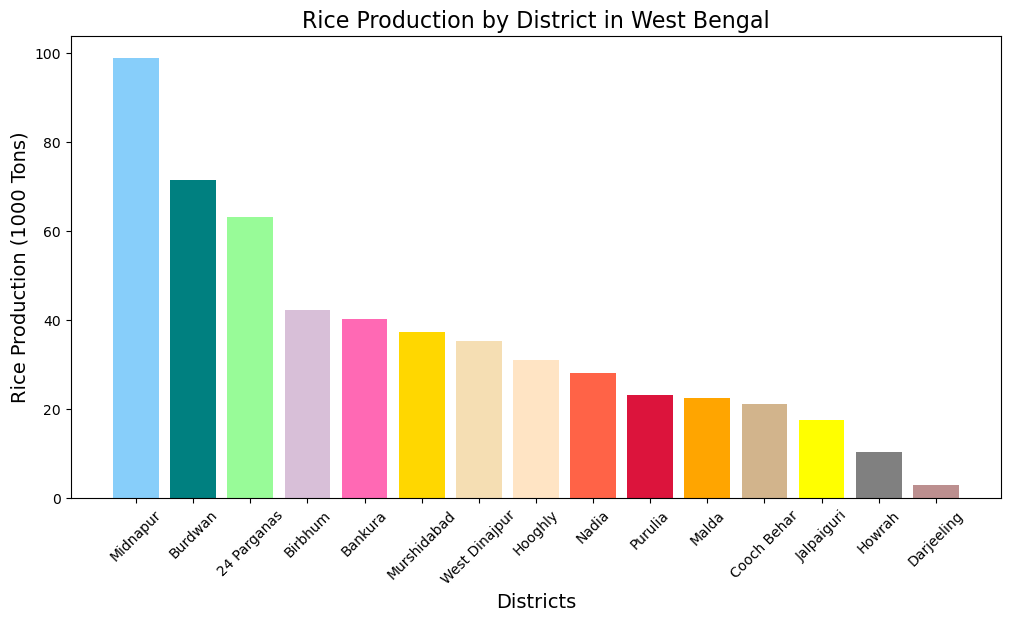

In [18]:
#Rice Production By West Bengal Districts
wb=df[df["state_name"]=="West Bengal"]
rice_prod_wb=wb.groupby("dist_name")["rice_production_1_ton"].sum().reset_index()
# Sorting data for better visualization
rice_prod_wb = rice_prod_wb.sort_values(by="rice_production_1_ton", ascending=False)
#colours
colors=["lightskyblue", "Teal", "palegreen", "thistle", "hotpink", "gold", "wheat", "bisque","tomato","crimson", "orange", "tan", "yellow","Grey", "rosybrown"]
#figure
plt.figure(figsize=(12,6))
# Plot bar chart
plt.bar(rice_prod_wb["dist_name"], rice_prod_wb["rice_production_1_ton"], color=colors[:len(rice_prod_wb)])
# Labels and title
plt.xlabel("Districts", fontsize=14)
plt.ylabel("Rice Production (1000 Tons)", fontsize=14)
plt.title("Rice Production by District in West Bengal", fontsize=16)
plt.xticks(rotation=45)  # Rotate district names for better readability
# Show plot
plt.show()

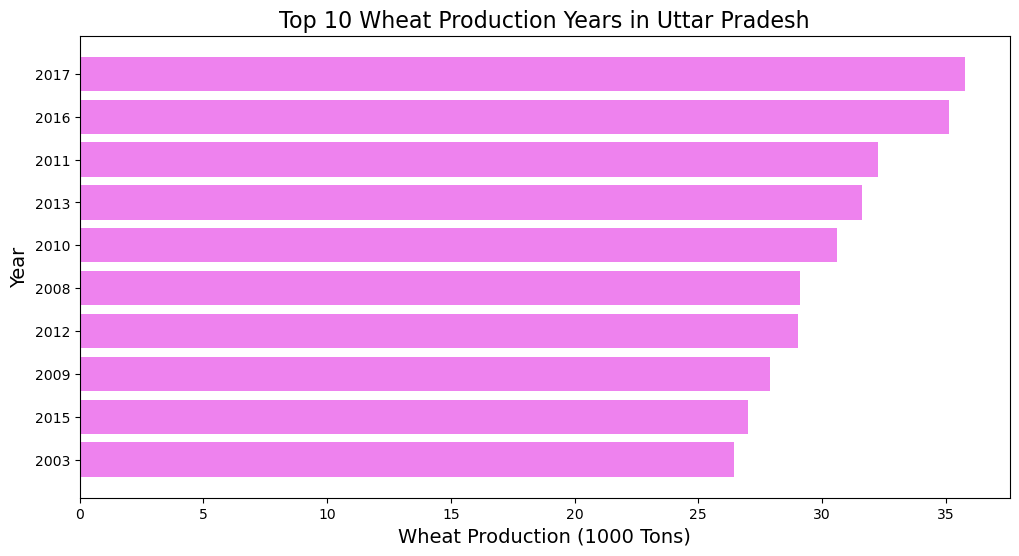

In [19]:
#Top 10 Wheat Production Years From UP
up_prod=df[df["state_name"]=="Uttar Pradesh"]
up_wheat_prod=up_prod.groupby("year")["wheat_production_1_ton"].sum().reset_index()
up_wheat_prod=up_wheat_prod.sort_values(by="wheat_production_1_ton",ascending=False).head(10)
up_wheat_prod=up_wheat_prod[::-1]
plt.figure(figsize=(12, 6))
plt.barh(up_wheat_prod["year"].astype(str), up_wheat_prod["wheat_production_1_ton"], color="violet")

# Labels and title
plt.xlabel("Wheat Production (1000 Tons)", fontsize=14)
plt.ylabel("Year", fontsize=14)
plt.title("Top 10 Wheat Production Years in Uttar Pradesh", fontsize=16)

# Show plot
plt.show()


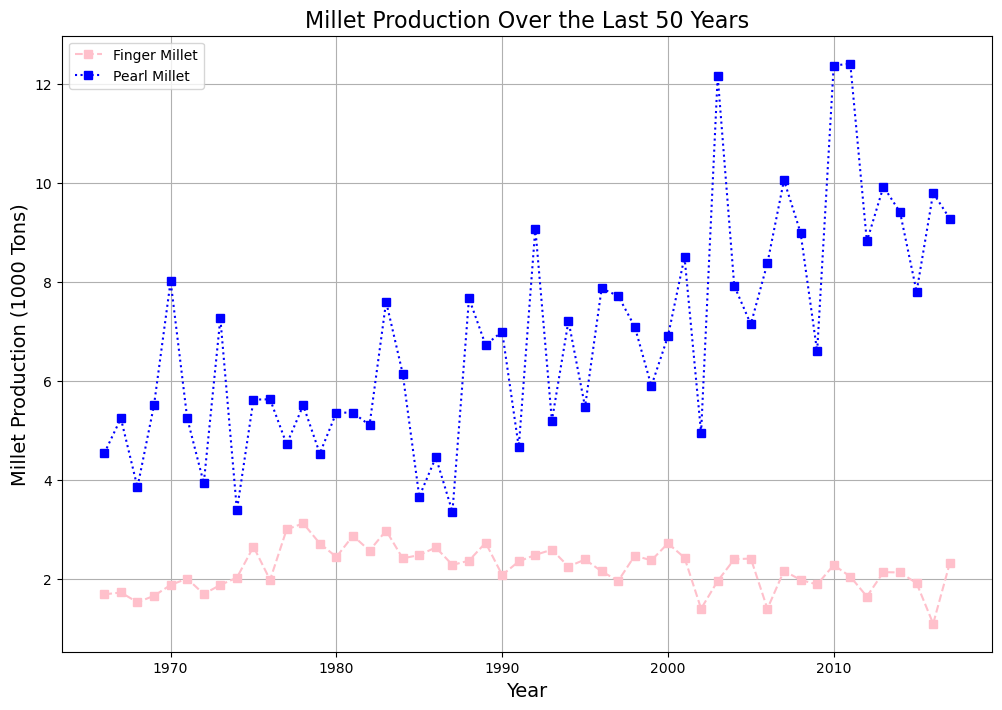

In [20]:
#Millet Production (Last 50y)
millet_prod = df.groupby("year")[["finger_millet_production_1_ton","pearl_millet_production_1_ton"]].sum().reset_index()
#figuresize
plt.figure(figsize=(12,8))
#plot
plt.plot(millet_prod["year"],millet_prod["finger_millet_production_1_ton"],marker="s",linestyle="--",color="pink",label="Finger Millet")
plt.plot(millet_prod["year"],millet_prod["pearl_millet_production_1_ton"],marker="s",linestyle=":",color="blue",label="Pearl Millet")
#label
plt.xlabel("Year",fontsize=14)
plt.ylabel("Millet Production (1000 Tons)",fontsize=14)
#title
plt.title("Millet Production Over the Last 50 Years", fontsize=16)
#legend
plt.legend(loc="upper left")
plt.grid(True)  
#show
plt.show()

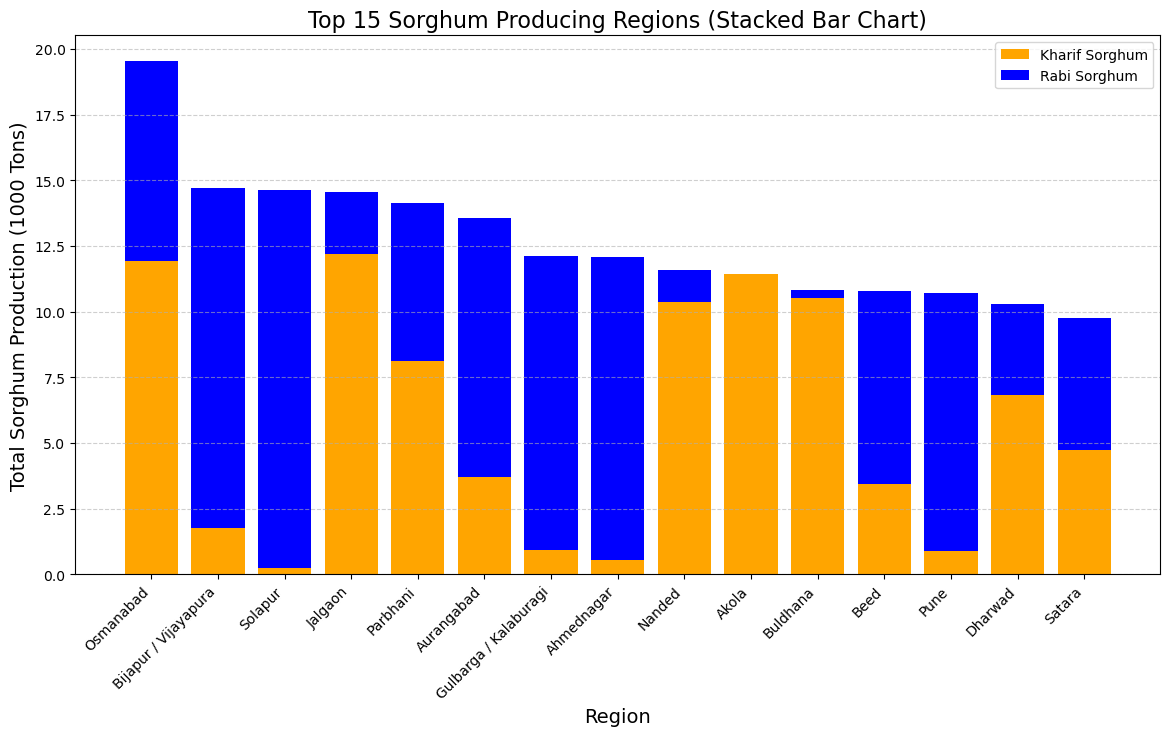

In [22]:
#Sorghum Production (Kharif and Rabi) by Region
sor_prod=df.groupby("dist_name")[["kharif_sorghum_production_1_ton","rabi_sorghum_production_1_ton"]].sum().reset_index()
# Sorting by total production
sor_prod["total_production"] = sor_prod["kharif_sorghum_production_1_ton"] + sor_prod["rabi_sorghum_production_1_ton"]
sor_top = sor_prod.sort_values("total_production", ascending=False).head(15)  # Take top 15 regions

# Plot Stacked Bar Chart
plt.figure(figsize=(14, 7))
plt.bar(sor_top["dist_name"], sor_top["kharif_sorghum_production_1_ton"], color="orange", label="Kharif Sorghum")
plt.bar(sor_top["dist_name"], sor_top["rabi_sorghum_production_1_ton"], color="blue", label="Rabi Sorghum", bottom=sor_top["kharif_sorghum_production_1_ton"])

# Labels and title
plt.xlabel("Region", fontsize=14)
plt.ylabel("Total Sorghum Production (1000 Tons)", fontsize=14)
plt.title("Top 15 Sorghum Producing Regions (Stacked Bar Chart)", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Show plot
plt.show()


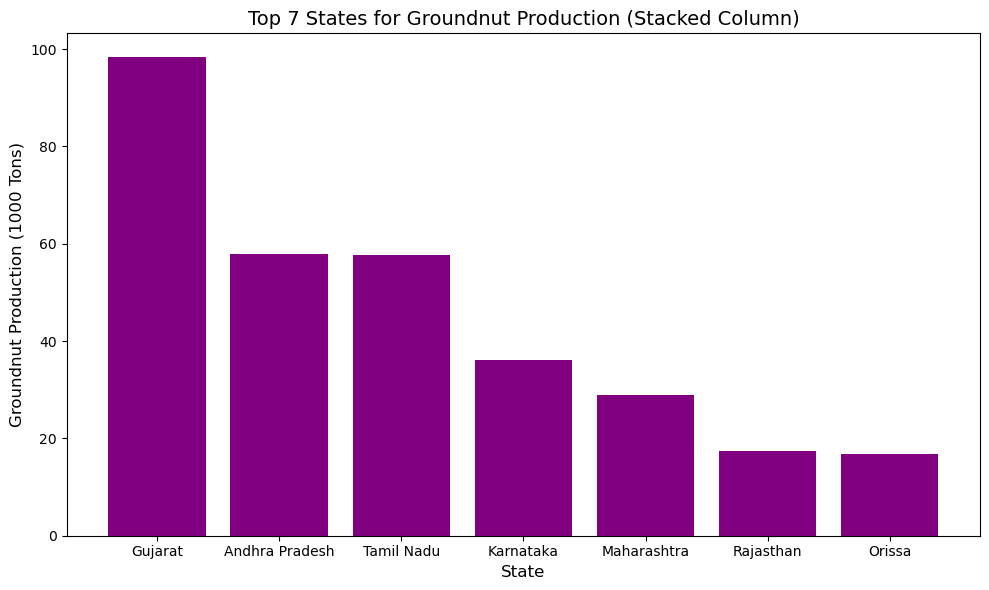

In [23]:
#Top 7 States for Groundnut Production
top_7_groundnut_states=df.groupby("state_name")["groundnut_production_1_ton"].sum().reset_index()
top_7_groundnut_states=top_7_groundnut_states.sort_values(by="groundnut_production_1_ton",ascending=False).head(7)

plt.figure(figsize=(10, 6))
plt.bar(top_7_groundnut_states["state_name"], top_7_groundnut_states["groundnut_production_1_ton"], color='purple')

# Add Labels and Title
plt.xlabel("State", fontsize=12)
plt.ylabel("Groundnut Production (1000 Tons)", fontsize=12)
plt.title("Top 7 States for Groundnut Production (Stacked Column)", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

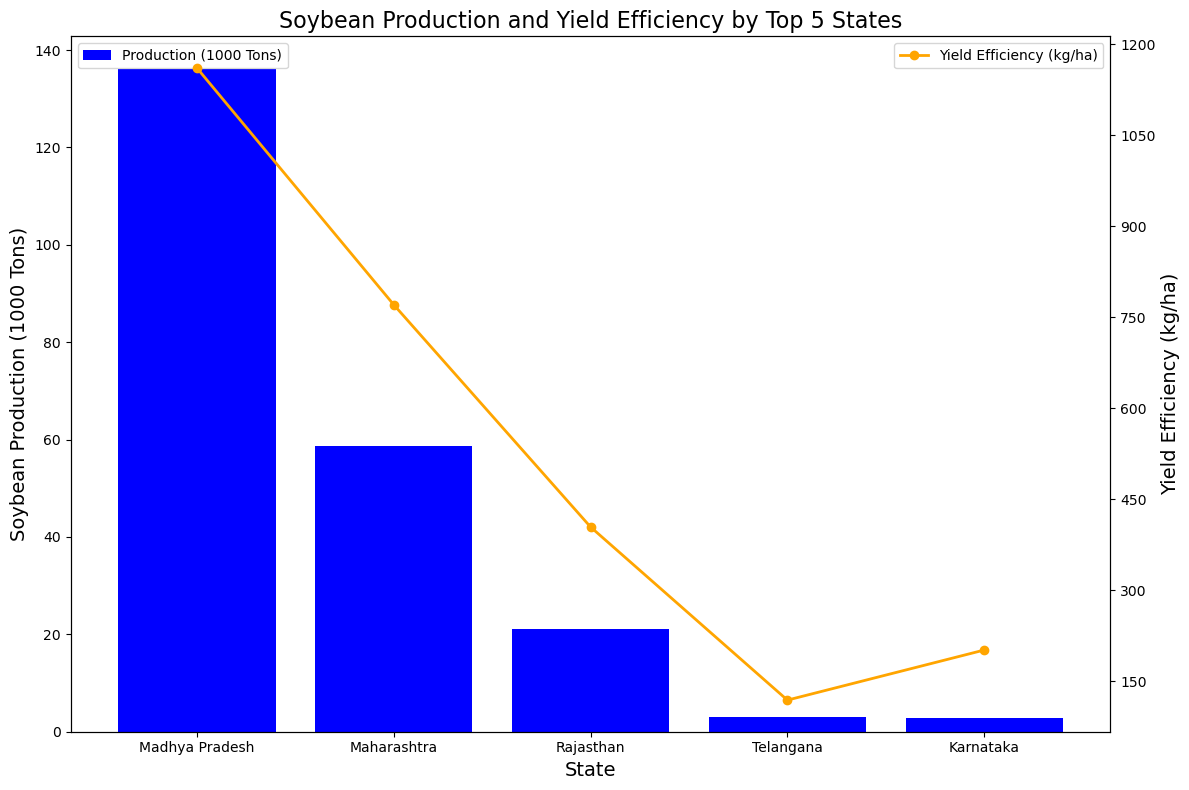

In [24]:
#Soybean Production by Top 5 States and Yield Efficiency
top_soybean_states = df.groupby("state_name")[["soyabean_production_1_ton","soyabean_yield_ton_per_ha"]].sum().reset_index()
top_5_soybean_states = top_soybean_states.sort_values(by="soyabean_production_1_ton",  ascending=False).head(5)

# Create the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Soybean Production
ax1.bar(top_5_soybean_states['state_name'],top_5_soybean_states['soyabean_production_1_ton'], color='blue', label="Production (1000 Tons)")
ax1.set_xlabel("State", fontsize=14)
ax1.set_ylabel("Soybean Production (1000 Tons)", fontsize=14)

# Create a second axis to plot Yield Efficiency
ax2 = ax1.twinx()
ax2.plot(top_5_soybean_states['state_name'], top_5_soybean_states['soyabean_yield_ton_per_ha'], color='orange', marker='o', linestyle='-', linewidth=2, label="Yield Efficiency (kg/ha)")
ax2.set_ylabel("Yield Efficiency (kg/ha)", fontsize=14)

# Add a title and legend
plt.title("Soybean Production and Yield Efficiency by Top 5 States", fontsize=16)
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Format y-axis of ax2 to integers
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.ticklabel_format(style='plain', axis='y')
# Show the plot
plt.tight_layout()
plt.show()

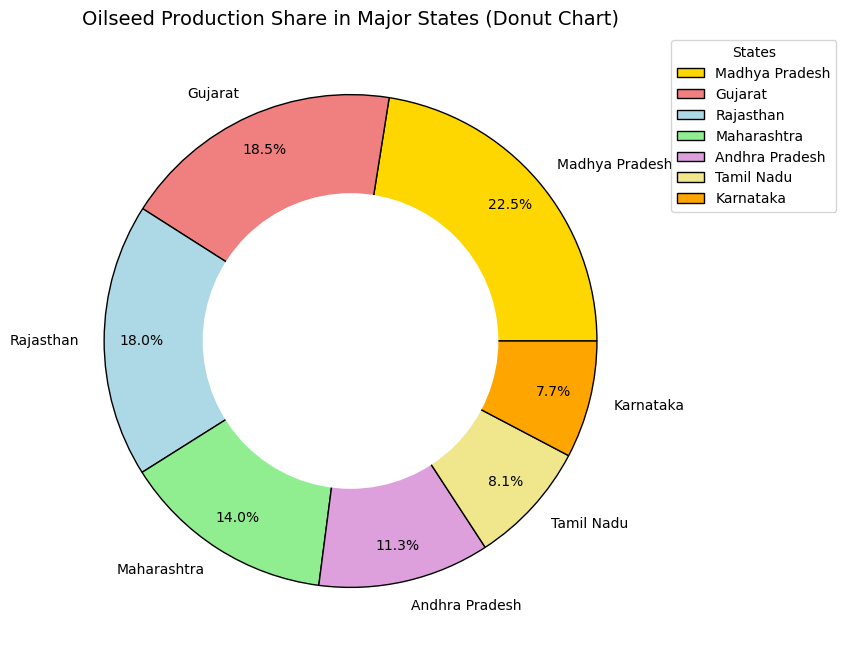

In [25]:
#Oilseed Production in Major States
oilseeds_states = df.groupby("state_name")["oilseeds_production_1_ton"].sum().reset_index()

# Select the top states based on oilseed production
top_oilseeds_states = oilseeds_states.sort_values(by="oilseeds_production_1_ton", ascending=False).head(7)

# Pie Chart (Donut Style)
plt.figure(figsize=(10, 8))
colors = ['gold', 'lightcoral', 'lightblue', 'lightgreen', 'plum', 'khaki', 'orange']
plt.pie(top_oilseeds_states["oilseeds_production_1_ton"], labels=top_oilseeds_states["state_name"], 
        autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1}, pctdistance=0.85)

# Creating the donut hole
center_circle = plt.Circle((0, 0), 0.6, fc='white')
plt.gca().add_artist(center_circle)

# Title and legend
plt.title("Oilseed Production Share in Major States (Donut Chart)", fontsize=14)
plt.legend(top_oilseeds_states["state_name"], title="States", loc="upper right", bbox_to_anchor=(1.3, 1))

# Show the plot
plt.show()


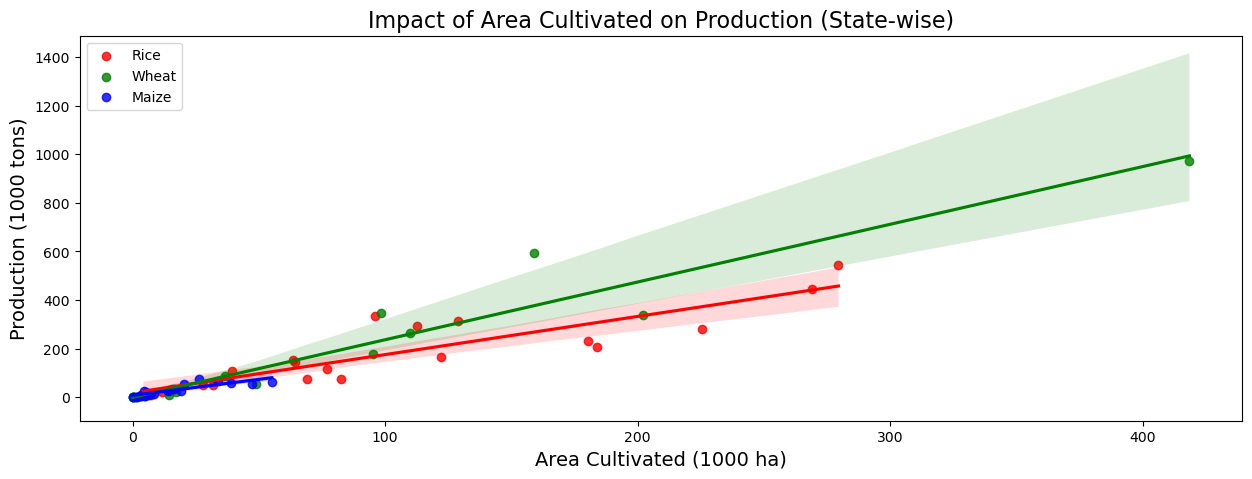

In [26]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)
area_cultivation_production=df.groupby("state_name")[["rice_area_1_ha", "rice_production_1_ton","wheat_area_1_ha", "wheat_production_1_ton",
                                      "maize_area_1_ha", "maize_production_1_ton"]].sum().reset_index()

import seaborn as sns

# Assuming area_cultivation_production is already computed
data = area_cultivation_production

# Create a figure
plt.figure(figsize=(15, 5))

# Scatter plots for each crop
sns.regplot(data=data, x="rice_area_1_ha", y="rice_production_1_ton", label="Rice", color="red")
sns.regplot(data=data, x="wheat_area_1_ha", y="wheat_production_1_ton", label="Wheat", color="green")
sns.regplot(data=data, x="maize_area_1_ha", y="maize_production_1_ton", label="Maize", color="blue")

# Labels and Title
plt.xlabel("Area Cultivated (1000 ha)", fontsize=14)
plt.ylabel("Production (1000 tons)", fontsize=14)
plt.title("Impact of Area Cultivated on Production (State-wise)", fontsize=16)
plt.ticklabel_format(style='plain', axis='y')
plt.legend()
plt.show()

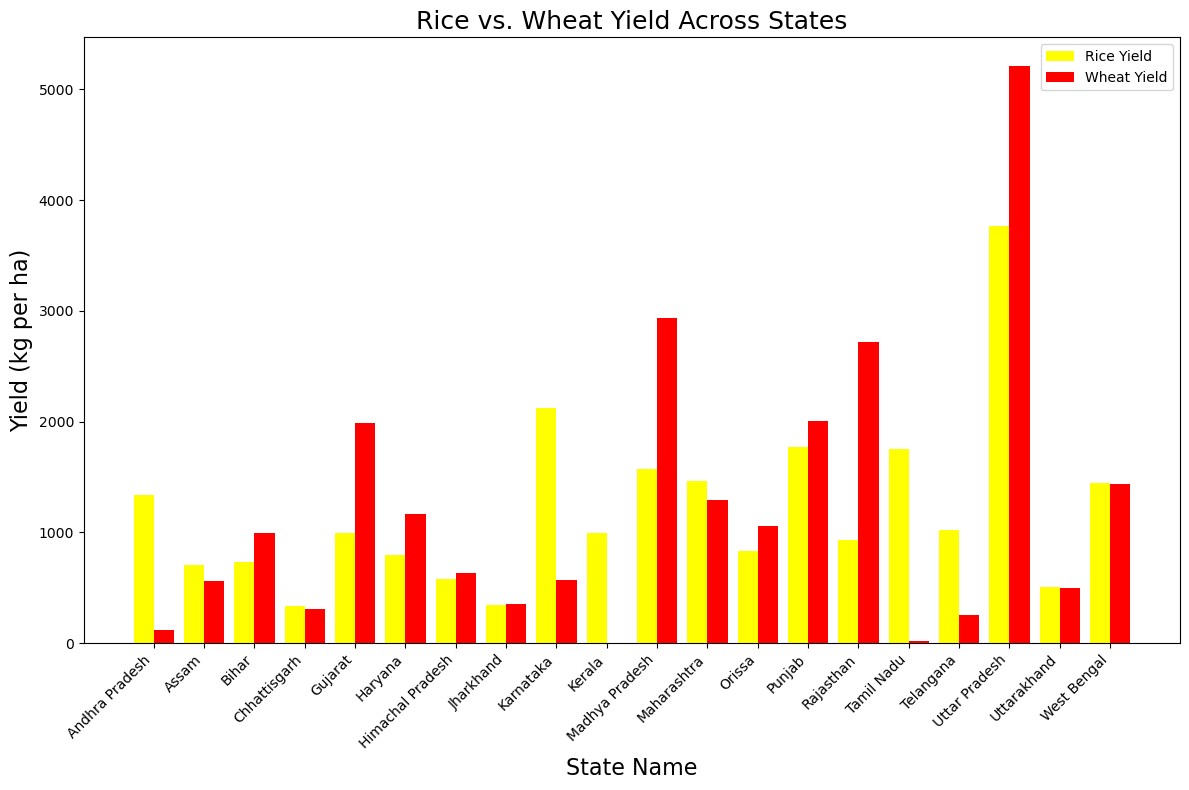

In [27]:
import numpy as np
# Group the rice and wheat yield
rice_yield = df.groupby("state_name")["rice_yield_ton_per_ha"].sum().reset_index()
wheat_yield = df.groupby("state_name")["wheat_yield_ton_per_ha"].sum().reset_index()

# Merge both dataframes on state_name
group_rice_wheat = pd.merge(rice_yield, wheat_yield, on="state_name", how="inner")

# Define X-axis positions
x = np.arange(len(group_rice_wheat["state_name"]))  # Numeric positions for states
width = 0.4  # Width of each bar

# Create figure
plt.figure(figsize=(12, 8))

# Plot Rice Yield (shifted left)
plt.bar(x - width/2, group_rice_wheat["rice_yield_ton_per_ha"], width=width, color="yellow", label="Rice Yield")

# Plot Wheat Yield (shifted right)
plt.bar(x + width/2, group_rice_wheat["wheat_yield_ton_per_ha"], width=width, color="red", label="Wheat Yield")

# Label the X-axis with state names
plt.xticks(x, group_rice_wheat["state_name"], rotation=45, ha="right")

# Labels and Title
plt.xlabel("State Name", fontsize=16)
plt.ylabel("Yield (kg per ha)", fontsize=16)
plt.title("Rice vs. Wheat Yield Across States", fontsize=18)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')


# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


In [102]:
pip install pymysql

Note: you may need to restart the kernel to use updated packages.
  Using cached PyMySQL-1.1.1-py3-none-any.whl.metadata (4.4 kB)
Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)


In [103]:
# Connecting jupter with mysql and creating a database
import pymysql
myconnection=pymysql.connect(host="127.0.0.1",user="root",passwd="Suveeswar@06")
myconnection.cursor().execute("create database agriculturedata")

1

In [104]:
#creating a table in the mysql database
dtype_mapping={
    "int64" : "INTEGER",
    "float64" : "FLOAT",
    "object" : "TEXT"}# craetting a dictionary to match the datatupe according to the column name
columns=",".join( f"{col} {dtype_mapping[str(dtypes)]}" for col,dtypes in zip(df.columns,df.dtypes))#column name with their coreesponding datatype with it
query=f"CREATE TABLE AGRICULTUREDATA.CROPDETAILS({columns})" #query to create the table
myconnection.cursor().execute(query)

0

In [105]:
#importing all the vslues into thr the tabl
for i in range(0,len(df)):
    myconnection.cursor().execute(f"INSERT INTO AGRICULTUREDATA.CROPDETAILS VALUES {tuple(df.iloc[i])}")
    myconnection.commit()